## Credit Risk Prediction — Model Training
### Objective
This notebook trains and evaluates multiple machine learning models
to predict **credit default risk** using the processed dataset.

Models covered:
- Logistic Regression (baseline credit scorecard)
- Random Forest (non-linear ensemble)
- XGBoost (advanced boosting model)

Evaluation focuses on:
- ROC-AUC (primary metric)
- Confusion Matrix
- Precision & Recall


In [37]:
# Importing Module
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,RocCurveDisplay,classification_report
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier

In [19]:
# Loading Processed Data
X_Train, X_Test, Y_Train, Y_Test=joblib.load('../data/processed_data.pkl')


In [20]:
# Logistic Regression
log_model=LogisticRegression()
log_model.fit(X_Train,Y_Train)

y_pred=log_model.predict(X_Test)
y_prob=log_model.predict_proba(X_Test)[:,1]
roc_log=roc_auc_score(Y_Test,y_prob)
print("Logistic Regression ROC-AUC:", round(roc_log, 4))

Logistic Regression ROC-AUC: 0.7515


In [21]:
# Logistic Regression Evaluation
print("Confusion Matrix :\n",confusion_matrix(Y_Test,y_pred))
print("\nClassification_Report:\n",classification_report(Y_Test,y_pred))

Confusion Matrix :
 [[4438  235]
 [ 914  413]]

Classification_Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



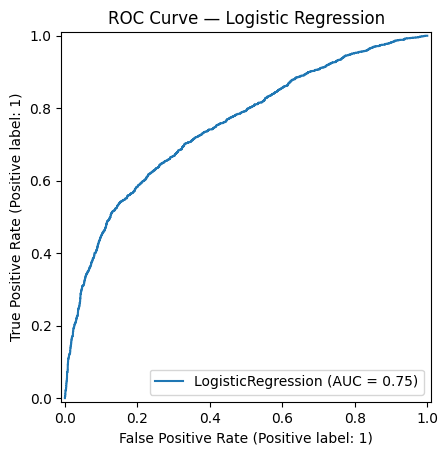

In [22]:
RocCurveDisplay.from_estimator(log_model,X_Test,Y_Test)
plt.title("ROC Curve — Logistic Regression")
plt.show()

In [23]:
# Random Forest Classifier
rf_model=RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_Train,Y_Train)
y_pred_rf=rf_model.predict(X_Test)
y_prob_rf=rf_model.predict_proba(X_Test)[:,1]
roc_rf=roc_auc_score(Y_Test,y_pred_rf)
print("Random Forest Classification ROC-AUC:", round(roc_rf, 4))

Random Forest Classification ROC-AUC: 0.6928


In [24]:
# Random Forest Classification Evaluation
print("Confusion Matrix :\n",confusion_matrix(Y_Test,y_pred_rf))
print("\nClassification_Report:\n",classification_report(Y_Test,y_pred_rf))

Confusion Matrix :
 [[4144  529]
 [ 665  662]]

Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.56      0.50      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



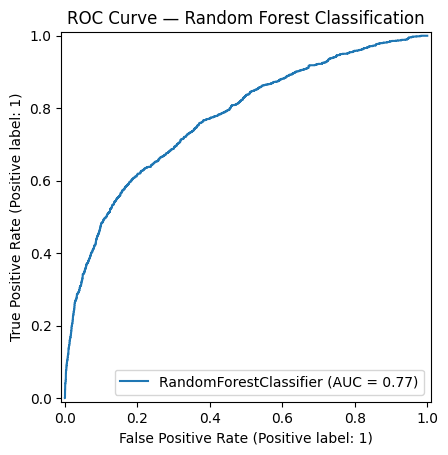

In [25]:
RocCurveDisplay.from_estimator(rf_model,X_Test,Y_Test)
plt.title("ROC Curve — Random Forest Classification")
plt.show()

In [31]:
scale_pos = (Y_Train == 0).sum() / (Y_Train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_Train,Y_Train)

y_pred_xgb=xgb_model.predict(X_Test)
y_prob_xgb=xgb_model.predict_proba(X_Test)[:,1]
roc_xgb=roc_auc_score(Y_Test,y_pred_xgb)
print("XGBClassification ROC-AUC Score: ",roc_xgb)

XGBClassification ROC-AUC Score:  0.7097479612795918


In [32]:
print("Confusion Matrix:\n", confusion_matrix(Y_Test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(Y_Test, y_pred_xgb))


Confusion Matrix:
 [[3714  959]
 [ 498  829]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.84      4673
           1       0.46      0.62      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000



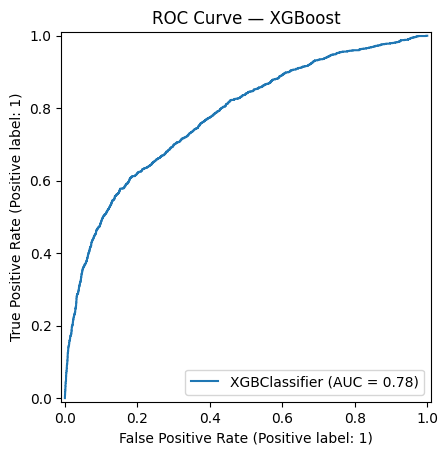

In [33]:
RocCurveDisplay.from_estimator(xgb_model, X_Test, Y_Test)
plt.title("ROC Curve — XGBoost")
plt.show()

In [36]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [roc_log, roc_rf, roc_xgb]
}).sort_values(by="ROC-AUC", ascending=False)

results


,Model,ROC-AUC
0,Logistic Regression,0.751544
2,XGBoost,0.709748
1,Random Forest,0.692833


In [41]:
# Saving The Best Model
os.makedirs("models", exist_ok=True)

best_model = xgb_model if roc_xgb >= max(roc_log, roc_rf) else log_model
joblib.dump(best_model, "../models/best_model.pkl")
print("Best model saved at models/best_model.pkl")


Best model saved at models/best_model.pkl


### Day-3 Summary
- Trained **Logistic Regression**, **Random Forest**, and **XGBoost**
- Evaluated using ROC-AUC, confusion matrix, precision, and recall
- Selected the best performing model
- Saved model